## Building Recurrent Neural Network 

In [3]:
# using numpy
import numpy as np
from rnn_utils import *


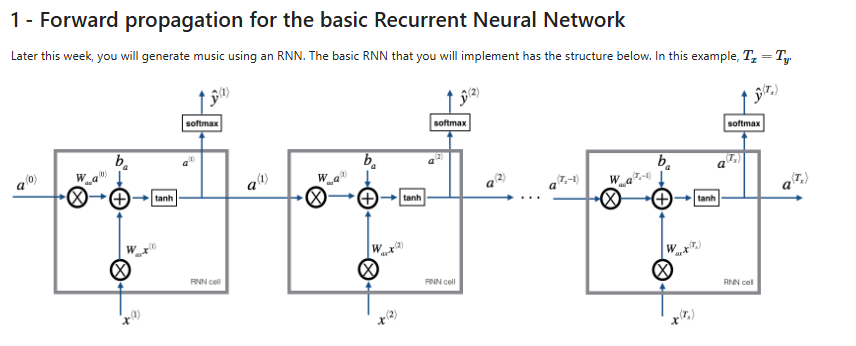


### 1.1 - RNN cell

- A recurrent neural network can be seen as the repeated use of a single cell. You are first going to implement the computations for a single time-step.

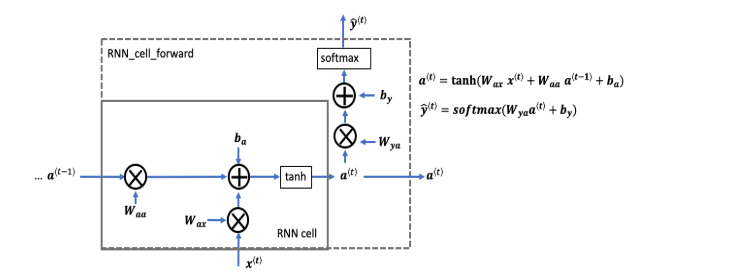

In [11]:
def rnn_cell_forward(xt, a_prev, parameters):
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]

    a_next = np.tanh(np.dot(Wax, xt) + np.dot(Waa, a_prev) + ba)
    yt_pred = softmax(np.dot(Wya, a_next) + by)

    cache = (a_next, a_prev, xt, parameters)
    return a_next, yt_pred, cache

In [3]:
np.random.seed(1)
xt_tmp = np.random.randn(3, 10)
a_prev_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp["Waa"] = np.random.randn(5, 5)
parameters_tmp["Wax"] = np.random.randn(5, 3)
parameters_tmp["Wya"] = np.random.randn(2, 5)
parameters_tmp["ba"] = np.random.randn(5, 1)
parameters_tmp["by"] = np.random.randn(2, 1)
a_next_tmp, yt_pred_tmp, cache_tmp = rnn_cell_forward(xt_tmp, a_prev_tmp, parameters_tmp)
print("a_next[4] = " + str(a_next_tmp[4]))
print("a_next.shape = \n", a_next_tmp.shape)
print("yt_pred[1] = " + str(yt_pred_tmp[1]))
print("yt_pred.shape = \n", yt_pred_tmp.shape)


a_next[4] = [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape = 
 (5, 10)
yt_pred[1] = [0.9888161  0.01682021 0.21140899 0.36817467 0.98988387 0.88945212
 0.36920224 0.9966312  0.9982559  0.17746526]
yt_pred.shape = 
 (2, 10)


### 1.2 - RNN forward pass

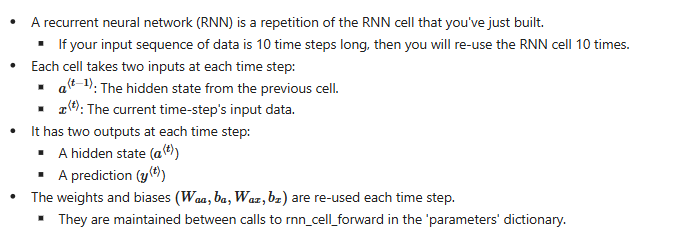

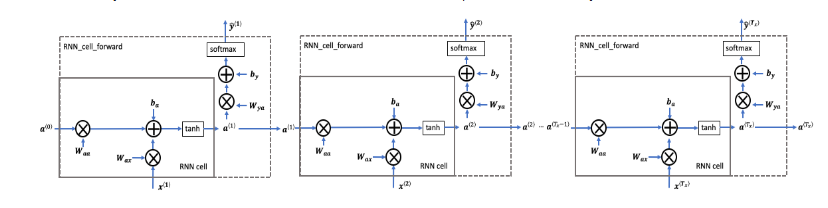

In [12]:
def rnn_forward(x, a0, parameters):

    caches = []
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape

    a = np.zeros((n_a, m, T_x))
    y_pred = np.zeros((n_y, m, T_x))

    a_next = a0

    for t in range(T_x):
        xt = x[:, :, t]
        a_next, yt_pred, cache = rnn_cell_forward(xt, a_next, parameters)
        a[:, :, t] = a_next
        y_pred[:, :, t] = yt_pred
        caches.append(cache)

    caches = (caches, x)
    return a, y_pred, caches

In [5]:
np.random.seed(1)
x_tmp = np.random.randn(3, 10, 4)
a0_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp["Waa"] = np.random.randn(5, 5)
parameters_tmp["Wax"] = np.random.randn(5, 3)
parameters_tmp["Wya"] = np.random.randn(2, 5)
parameters_tmp["ba"] = np.random.randn(5, 1)
parameters_tmp["by"] = np.random.randn(2, 1)

a_tmp, y_pred_tmp, caches_tmp = rnn_forward(x_tmp, a0_tmp, parameters_tmp)
print("a[4][1] = " + str(a_tmp[4][1]))
print("a.shape = \n", a_tmp.shape)
print("y_pred[1][3] = " + str(y_pred_tmp[1][3]))
print("y_pred.shape = \n", y_pred_tmp.shape)
print("caches[1][1][3] = " + str(caches_tmp[1][1][3]))
print("len(caches) = " + str(len(caches_tmp)))


a[4][1] = [-0.99999375  0.77911235 -0.99861469 -0.99833267]
a.shape = 
 (5, 10, 4)
y_pred[1][3] = [0.79560373 0.86224861 0.11118257 0.81515947]
y_pred.shape = 
 (2, 10, 4)
caches[1][1][3] = [-1.1425182  -0.34934272 -0.20889423  0.58662319]
len(caches) = 2


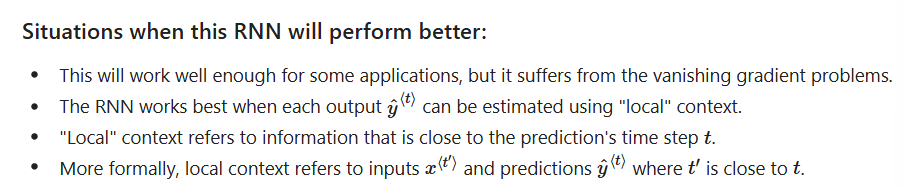

### 2 - Long Short-Term Memory (LSTM) network

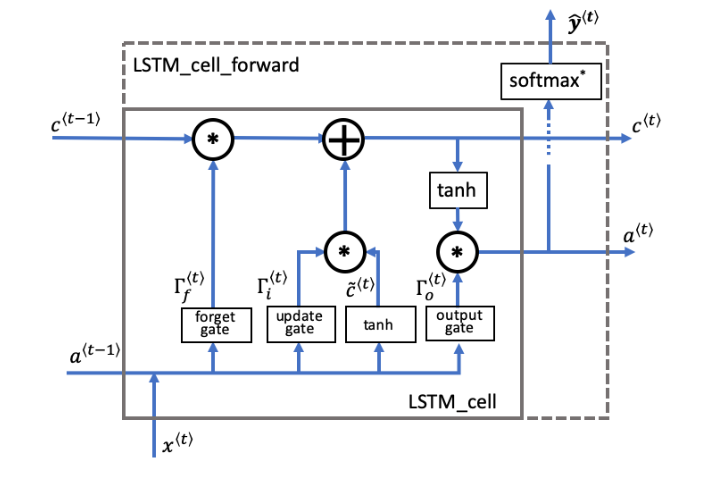

#### 2.1 LSTM cell

In [4]:
def lstm_cell_forward(xt, a_prev, c_prev, parameters):
    Wf = parameters["Wf"] # forget gate weights
    bf = parameters["bf"]
    Wi = parameters["Wi"] # update gate weights
    bi = parameters["bi"]
    Wo = parameters["Wo"] # output gate weights
    bo = parameters["bo"]
    Wc = parameters["Wc"] # candidate value weights 
    bc = parameters["bc"]
    Wy = parameters["Wy"] # prediction weights
    by = parameters["by"]

    n_x, m = xt.shape
    n_a, m = a_prev.shape

    concat = np.zeros((n_a + n_x, m))
    concat[: n_a, :] = a_prev
    concat[n_a :, :] = xt

    ft = sigmoid(np.dot(Wf, concat) + bf) # forget gate equation 
    it = sigmoid(np.dot(Wi, concat) + bi) # update gate equation
    cct = np.tanh(np.dot(Wc, concat) + bc) # c tilde value
    c_next = ft * c_prev + it * cct # our cell state
    ot = sigmoid(np.dot(Wo, concat) + bo) # output gate equation
    a_next = ot * np.tanh(c_next) # hidden state

    yt_pred = softmax(np.dot(Wy, a_next) + by) # next output/prediction

    cache = (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters)
    return a_next, c_next, yt_pred, cache

In [5]:
np.random.seed(1)
xt_tmp = np.random.randn(3, 10)
a_prev_tmp = np.random.randn(5, 10)
c_prev_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp["Wf"] = np.random.randn(5, 8)
parameters_tmp["bf"] = np.random.randn(5, 1)
parameters_tmp["Wi"] = np.random.randn(5, 8)
parameters_tmp["bi"] = np.random.randn(5, 1)
parameters_tmp["Wo"] = np.random.randn(5, 8)
parameters_tmp["bo"] = np.random.randn(5, 1)
parameters_tmp["Wc"] = np.random.randn(5, 8)
parameters_tmp["bc"] = np.random.randn(5, 1)
parameters_tmp["Wy"] = np.random.randn(2, 5)
parameters_tmp["by"] = np.random.randn(2, 1)

a_next_tmp, c_next_tmp, yt_pred_tmp, cache_tmp = lstm_cell_forward(xt_tmp, a_prev_tmp, c_prev_tmp, parameters_tmp)
print("a_next[4] = " + str(a_next_tmp[4]))
print("a_next.shape = \n", a_next_tmp.shape)
print("c_next[2] = " + str(c_next_tmp[2]))
print("c_next.shape = \n", c_next_tmp.shape)
print("yt_pred[1] = " + str(yt_pred_tmp[1]))
print("yt_pred.shape = \n", yt_pred_tmp.shape)
print("cache[1][3] = " + str(cache_tmp[1][3]))
print("len(cache) = " + str(len(cache_tmp)))

a_next[4] = [-0.66408471  0.0036921   0.02088357  0.22834167 -0.85575339  0.00138482
  0.76566531  0.34631421 -0.00215674  0.43827275]
a_next.shape = 
 (5, 10)
c_next[2] = [ 0.63267805  1.00570849  0.35504474  0.20690913 -1.64566718  0.11832942
  0.76449811 -0.0981561  -0.74348425 -0.26810932]
c_next.shape = 
 (5, 10)
yt_pred[1] = [0.79913913 0.15986619 0.22412122 0.15606108 0.97057211 0.31146381
 0.00943007 0.12666353 0.39380172 0.07828381]
yt_pred.shape = 
 (2, 10)
cache[1][3] = [-0.16263996  1.03729328  0.72938082 -0.54101719  0.02752074 -0.30821874
  0.07651101 -1.03752894  1.41219977 -0.37647422]
len(cache) = 10


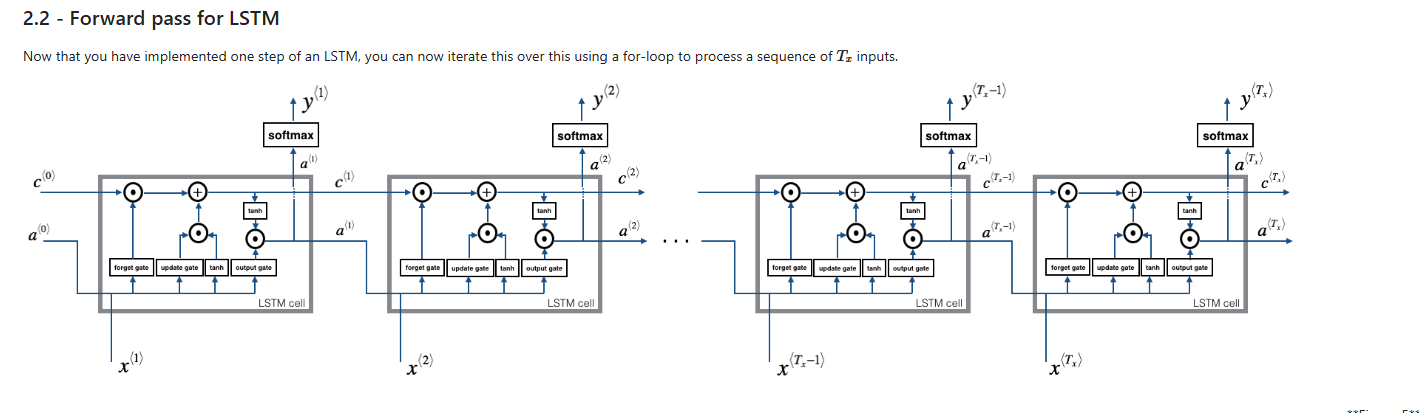

In [7]:
def lstm_forward(x, a0, parameters):
    caches = []

    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wy"].shape

    a = np.zeros((n_a, m, T_x))
    c = np.zeros_like(a)
    y = np.zeros((n_y, m, T_x))

    a_next = a0
    c_next = np.zeros_like(a_next)

    for t in range(T_x):
        xt = x[:, :, t]
        a_next, c_next, yt, cache = lstm_cell_forward(xt, a_next, c_next, parameters)
        a[:, :, t] = a_next
        c[:, :, t] = c_next
        y[:, :, t] = yt
        caches.append(cache)

    caches = (caches, x)
    return a, y, c, caches

In [8]:
np.random.seed(1)
x_tmp = np.random.randn(3, 10, 7)
a0_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Wf'] = np.random.randn(5, 5+3)
parameters_tmp['bf'] = np.random.randn(5,1)
parameters_tmp['Wi'] = np.random.randn(5, 5+3)
parameters_tmp['bi']= np.random.randn(5,1)
parameters_tmp['Wo'] = np.random.randn(5, 5+3)
parameters_tmp['bo'] = np.random.randn(5,1)
parameters_tmp['Wc'] = np.random.randn(5, 5+3)
parameters_tmp['bc'] = np.random.randn(5,1)
parameters_tmp['Wy'] = np.random.randn(2,5)
parameters_tmp['by'] = np.random.randn(2,1)

a_tmp, y_tmp, c_tmp, caches_tmp = lstm_forward(x_tmp, a0_tmp, parameters_tmp)
print("a[4][3][6] = ", a_tmp[4][3][6])
print("a.shape = ", a_tmp.shape)
print("y[1][4][3] =", y_tmp[1][4][3])
print("y.shape = ", y_tmp.shape)
print("caches[1][1][1] =\n", caches_tmp[1][1][1])
print("c[1][2][1]", c_tmp[1][2][1])
print("len(caches) = ", len(caches_tmp))

a[4][3][6] =  0.1721177675329167
a.shape =  (5, 10, 7)
y[1][4][3] = 0.9508734618501101
y.shape =  (2, 10, 7)
caches[1][1][1] =
 [ 0.82797464  0.23009474  0.76201118 -0.22232814 -0.20075807  0.18656139
  0.41005165]
c[1][2][1] -0.8555449167181983
len(caches) =  2


### 3. Backpropagation in recurrent neural networks

#### 3.1 Basic RNN backward pass

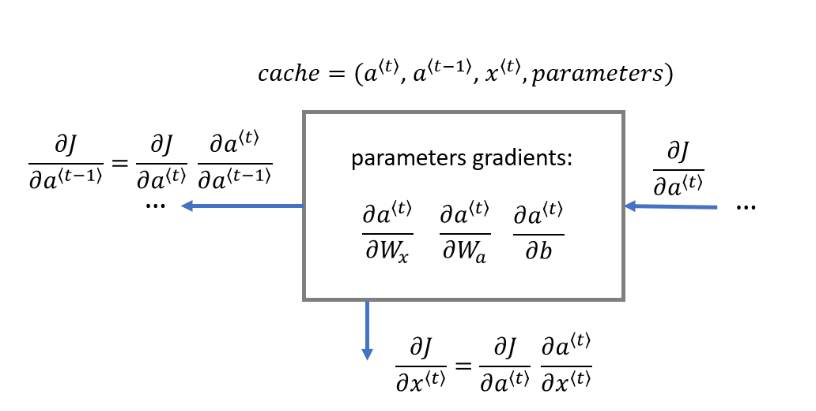

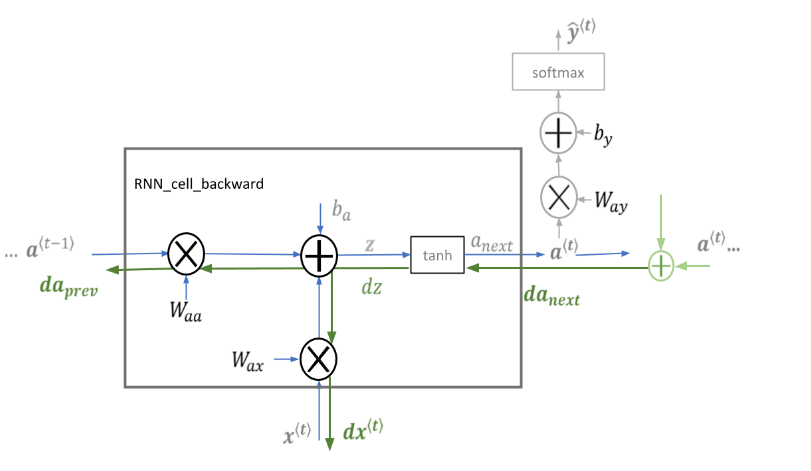

- Here, ∗ denotes element-wise multiplication while the absence of a symbol indicates matrix multiplication.

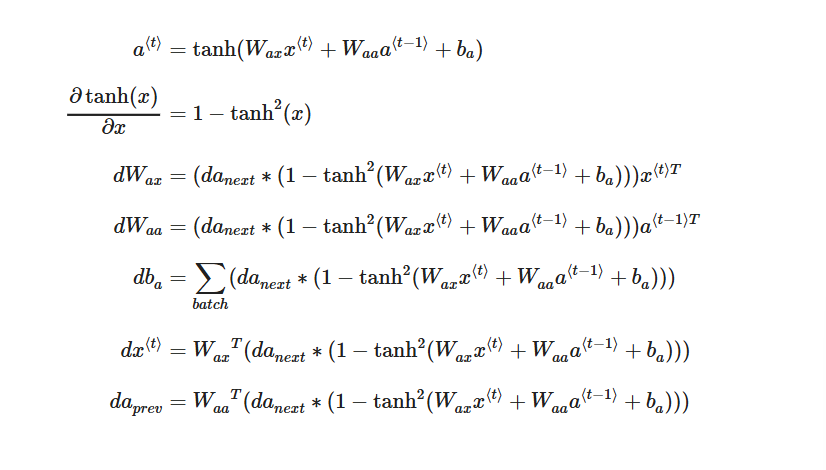


In [9]:
def rnn_backward(da_next, cache):
    (a_next, a_prev, xt, parameters) = cache

    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]

    dtanh = (1 - a_next ** 2) * da_next

    dWax = np.dot(dtanh, xt.T)
    dWaa = np.dot(dtanh, a_prev.T)
    dba = np.sum(dtanh, axis=1, keepdims=True)
    da_prev = np.dot(Waa.T, dtanh)
    dxt = np.dot(Wax.T, dtanh)

    gradients = {"dxt": dxt, "da_prev": da_prev, "dWax": dWax, "dWaa": dWaa, "dba": dba}

    return gradients

In [13]:
np.random.seed(1)
xt_tmp = np.random.randn(3,10)
a_prev_tmp = np.random.randn(5,10)
parameters_tmp = {}
parameters_tmp['Wax'] = np.random.randn(5,3)
parameters_tmp['Waa'] = np.random.randn(5,5)
parameters_tmp['Wya'] = np.random.randn(2,5)
parameters_tmp['ba'] = np.random.randn(5,1)
parameters_tmp['by'] = np.random.randn(2,1)

a_next_tmp, yt_tmp, cache_tmp = rnn_cell_forward(xt_tmp, a_prev_tmp, parameters_tmp)

da_next_tmp = np.random.randn(5,10)
gradients_tmp = rnn_backward(da_next_tmp, cache_tmp)
print("gradients[\"dxt\"][1][2] =", gradients_tmp["dxt"][1][2])
print("gradients[\"dxt\"].shape =", gradients_tmp["dxt"].shape)
print("gradients[\"da_prev\"][2][3] =", gradients_tmp["da_prev"][2][3])
print("gradients[\"da_prev\"].shape =", gradients_tmp["da_prev"].shape)
print("gradients[\"dWax\"][3][1] =", gradients_tmp["dWax"][3][1])
print("gradients[\"dWax\"].shape =", gradients_tmp["dWax"].shape)
print("gradients[\"dWaa\"][1][2] =", gradients_tmp["dWaa"][1][2])
print("gradients[\"dWaa\"].shape =", gradients_tmp["dWaa"].shape)
print("gradients[\"dba\"][4] =", gradients_tmp["dba"][4])
print("gradients[\"dba\"].shape =", gradients_tmp["dba"].shape)

gradients["dxt"][1][2] = -1.3872130506020928
gradients["dxt"].shape = (3, 10)
gradients["da_prev"][2][3] = -0.1523994937739543
gradients["da_prev"].shape = (5, 10)
gradients["dWax"][3][1] = 0.41077282493545836
gradients["dWax"].shape = (5, 3)
gradients["dWaa"][1][2] = 1.1503450668497135
gradients["dWaa"].shape = (5, 5)
gradients["dba"][4] = [0.20023491]
gradients["dba"].shape = (5, 1)


- **Backward pass through the RNN**

In [15]:
def rnn_backward_pass(da, caches):
    (caches, x) = caches
    n_a, m, T_x = da.shape
    n_x, m = x.shape[0], x.shape[1]

    dx = np.zeros((n_x, m, T_x))
    dWax = np.zeros((n_a, n_x))
    dWaa = np.zeros((n_a, n_a))
    dba = np.zeros((n_a, 1))
    da0 = np.zeros((n_a, m))

    da_prevt = np.zeros((n_a, m))

    for t in reversed(range(T_x)):
        cache = caches[t]
        da_next = da[:, :, t] + da_prevt
        gradients = rnn_backward(da_next, cache)
        dx[:, :, t] = gradients["dxt"]
        dWax += gradients["dWax"]
        dWaa += gradients["dWaa"]
        dba += gradients["dba"]
        da_prevt = gradients["da_prev"]

    da0 = da_prevt

    gradients = {"dx": dx, "da0": da0, "dWax": dWax, "dWaa": dWaa, "dba": dba}

    return gradients


In [16]:
np.random.seed(1)
x_tmp = np.random.randn(3,10,4)
a0_tmp = np.random.randn(5,10)
parameters_tmp = {}
parameters_tmp['Wax'] = np.random.randn(5,3)
parameters_tmp['Waa'] = np.random.randn(5,5)
parameters_tmp['Wya'] = np.random.randn(2,5)
parameters_tmp['ba'] = np.random.randn(5,1)
parameters_tmp['by'] = np.random.randn(2,1)

a_tmp, y_tmp, caches_tmp = rnn_forward(x_tmp, a0_tmp, parameters_tmp)
da_tmp = np.random.randn(5, 10, 4)
gradients_tmp = rnn_backward_pass(da_tmp, caches_tmp)

print("gradients[\"dx\"][1][2] =", gradients_tmp["dx"][1][2])
print("gradients[\"dx\"].shape =", gradients_tmp["dx"].shape)
print("gradients[\"da0\"][2][3] =", gradients_tmp["da0"][2][3])
print("gradients[\"da0\"].shape =", gradients_tmp["da0"].shape)
print("gradients[\"dWax\"][3][1] =", gradients_tmp["dWax"][3][1])
print("gradients[\"dWax\"].shape =", gradients_tmp["dWax"].shape)
print("gradients[\"dWaa\"][1][2] =", gradients_tmp["dWaa"][1][2])
print("gradients[\"dWaa\"].shape =", gradients_tmp["dWaa"].shape)
print("gradients[\"dba\"][4] =", gradients_tmp["dba"][4])
print("gradients[\"dba\"].shape =", gradients_tmp["dba"].shape)

gradients["dx"][1][2] = [-2.07101689 -0.59255627  0.02466855  0.01483317]
gradients["dx"].shape = (3, 10, 4)
gradients["da0"][2][3] = -0.3149423751266506
gradients["da0"].shape = (5, 10)
gradients["dWax"][3][1] = 11.264104496527771
gradients["dWax"].shape = (5, 3)
gradients["dWaa"][1][2] = 2.303333126579893
gradients["dWaa"].shape = (5, 5)
gradients["dba"][4] = [-0.74747722]
gradients["dba"].shape = (5, 1)


#### 3.2 LSTM backward pass

##### 3.2.1 One step backward

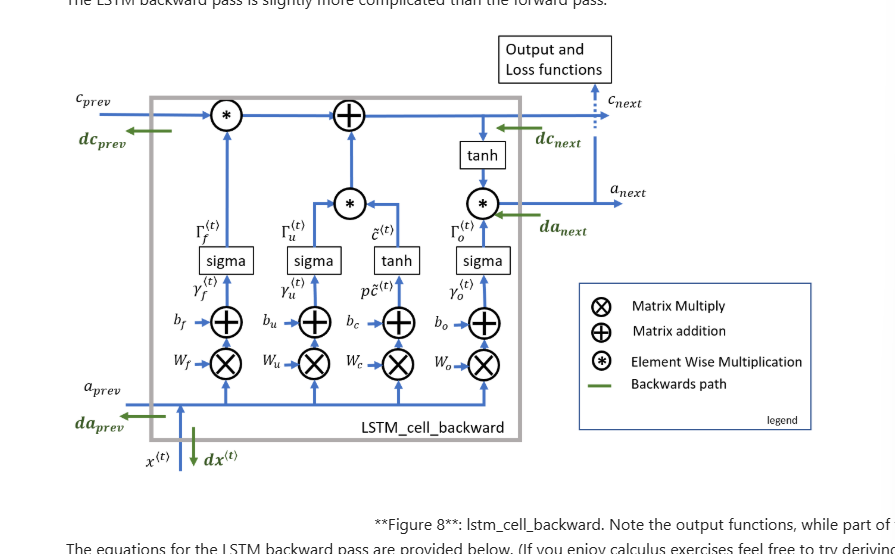

##### 3.2.2 Gate derivatives

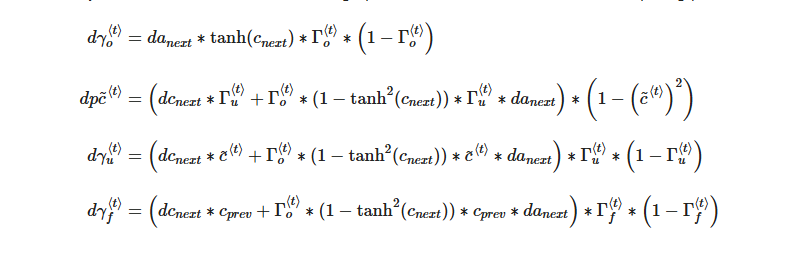

##### 3.2.3 parameter derivatives

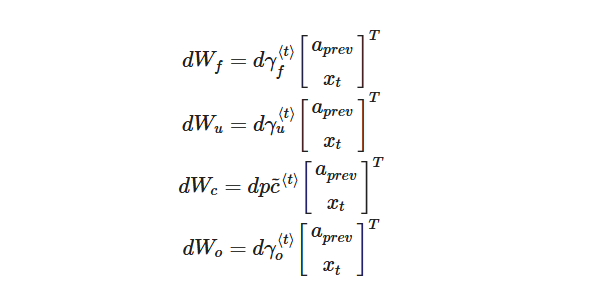


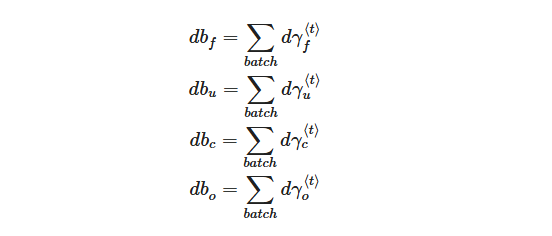

---

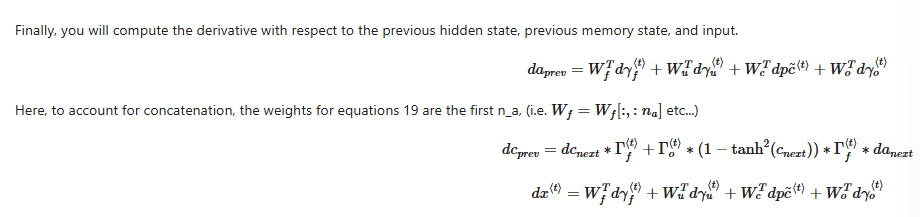



In [ ]:
def lstm_cell_backward(da_next, dc_next, cache):
    (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters) = cache

    Wf = parameters["Wf"]
    Wi = parameters["Wi"]
    Wo = parameters["Wo"]
    Wc = parameters["Wc"]
    bf = parameters["bf"]
    bi = parameters["bi"]
    bo = parameters["bo"]
    bc = parameters["bc"]

    n_x, m = xt.shape
    n_a, m = a_next.shape

    dxt = np.zeros_like(xt)
    da_prev = np.zeros_like(a_prev)
    dc_prev = np.zeros_like(c_prev)
    dWf = np.zeros_like(Wf)
    dWi = np.zeros_like(Wi)
    dWo = np.zeros_like(Wo)
    dWc = np.zeros_like(Wc)
    dbf = np.zeros_like(bf)
    dbi = np.zeros_like(bi)
    dbo = np.zeros_like(bo)
    dbc = np.zeros_like(bc)

    gradients = {"dxt": dxt, "da_prev": da_prev, "dc_prev": dc_prev,
                 "dWf": dWf, "dWi": dWi, "dWo": dWo, "dWc": dWc,
                 "dbf": dbf, "dbi": dbi, "dbo": dbo, "dbc": dbc}

    return gradients

In [18]:
np.random.seed(1)
xt_tmp = np.random.randn(3,10)
a_prev_tmp = np.random.randn(5,10)
c_prev_tmp = np.random.randn(5,10)
parameters_tmp = {}
parameters_tmp['Wf'] = np.random.randn(5, 5+3)
parameters_tmp['bf'] = np.random.randn(5,1)
parameters_tmp['Wi'] = np.random.randn(5, 5+3)
parameters_tmp['bi'] = np.random.randn(5,1)
parameters_tmp['Wo'] = np.random.randn(5, 5+3)
parameters_tmp['bo'] = np.random.randn(5,1)
parameters_tmp['Wc'] = np.random.randn(5, 5+3)
parameters_tmp['bc'] = np.random.randn(5,1)
parameters_tmp['Wy'] = np.random.randn(2,5)
parameters_tmp['by'] = np.random.randn(2,1)

a_next_tmp, c_next_tmp, yt_tmp, cache_tmp = lstm_cell_forward(xt_tmp, a_prev_tmp, c_prev_tmp, parameters_tmp)

da_next_tmp = np.random.randn(5,10)
dc_next_tmp = np.random.randn(5,10)
gradients_tmp = lstm_cell_backward(da_next_tmp, dc_next_tmp, cache_tmp)
print("gradients[\"dxt\"][1][2] =", gradients_tmp["dxt"][1][2])
print("gradients[\"dxt\"].shape =", gradients_tmp["dxt"].shape)
print("gradients[\"da_prev\"][2][3] =", gradients_tmp["da_prev"][2][3])
print("gradients[\"da_prev\"].shape =", gradients_tmp["da_prev"].shape)
print("gradients[\"dc_prev\"][2][3] =", gradients_tmp["dc_prev"][2][3])
print("gradients[\"dc_prev\"].shape =", gradients_tmp["dc_prev"].shape)
print("gradients[\"dWf\"][3][1] =", gradients_tmp["dWf"][3][1])
print("gradients[\"dWf\"].shape =", gradients_tmp["dWf"].shape)
print("gradients[\"dWi\"][1][2] =", gradients_tmp["dWi"][1][2])
print("gradients[\"dWi\"].shape =", gradients_tmp["dWi"].shape)
print("gradients[\"dWc\"][3][1] =", gradients_tmp["dWc"][3][1])
print("gradients[\"dWc\"].shape =", gradients_tmp["dWc"].shape)
print("gradients[\"dWo\"][1][2] =", gradients_tmp["dWo"][1][2])
print("gradients[\"dWo\"].shape =", gradients_tmp["dWo"].shape)
print("gradients[\"dbf\"][4] =", gradients_tmp["dbf"][4])
print("gradients[\"dbf\"].shape =", gradients_tmp["dbf"].shape)
print("gradients[\"dbi\"][4] =", gradients_tmp["dbi"][4])
print("gradients[\"dbi\"].shape =", gradients_tmp["dbi"].shape)
print("gradients[\"dbc\"][4] =", gradients_tmp["dbc"][4])
print("gradients[\"dbc\"].shape =", gradients_tmp["dbc"].shape)
print("gradients[\"dbo\"][4] =", gradients_tmp["dbo"][4])
print("gradients[\"dbo\"].shape =", gradients_tmp["dbo"].shape)

gradients["dxt"][1][2] = 0.0
gradients["dxt"].shape = (3, 10)
gradients["da_prev"][2][3] = 0.0
gradients["da_prev"].shape = (5, 10)
gradients["dc_prev"][2][3] = 0.0
gradients["dc_prev"].shape = (5, 10)
gradients["dWf"][3][1] = 0.0
gradients["dWf"].shape = (5, 8)
gradients["dWi"][1][2] = 0.0
gradients["dWi"].shape = (5, 8)
gradients["dWc"][3][1] = 0.0
gradients["dWc"].shape = (5, 8)
gradients["dWo"][1][2] = 0.0
gradients["dWo"].shape = (5, 8)
gradients["dbf"][4] = [0.]
gradients["dbf"].shape = (5, 1)
gradients["dbi"][4] = [0.]
gradients["dbi"].shape = (5, 1)
gradients["dbc"][4] = [0.]
gradients["dbc"].shape = (5, 1)
gradients["dbo"][4] = [0.]
gradients["dbo"].shape = (5, 1)


#### 3.3 Backward pass through the LSTM RNN

In [19]:
def lstm_backward(da, caches):
    (caches, x) = caches
    n_a, m, T_x = da.shape
    n_x, m = x.shape[0], x.shape[1]

    dx = np.zeros((n_x, m, T_x))
    da0 = np.zeros((n_a, m))
    dc0 = np.zeros((n_a, m))
    dWf = np.zeros((n_a, n_a + n_x))
    dWi = np.zeros((n_a, n_a + n_x))
    dWc = np.zeros((n_a, n_a + n_x))
    dWo = np.zeros((n_a, n_a + n_x))
    dbf = np.zeros((n_a, 1))
    dbi = np.zeros((n_a, 1))
    dbc = np.zeros((n_a, 1))
    dbo = np.zeros((n_a, 1))

    da_prevt = np.zeros((n_a, m))
    dc_prevt = np.zeros((n_a, m))

    for t in reversed(range(T_x)):
        cache = caches[t]
        da_next = da[:, :, t] + da_prevt
        dc_next = dc_prevt
        gradients = lstm_cell_backward(da_next, dc_next, cache)
        dx[:, :, t] = gradients["dxt"]
        dWf += gradients["dWf"]
        dWi += gradients["dWi"]
        dWc += gradients["dWc"]
        dWo += gradients["dWo"]
        dbf += gradients["dbf"]
        dbi += gradients["dbi"]
        dbc += gradients["dbc"]
        dbo += gradients["dbo"]
        da_prevt = gradients["da_prev"]
        dc_prevt = gradients["dc_prev"]

    da0 = da_prevt
    dc0 = dc_prevt

    gradients = {"dx": dx, "da0": da0, "dc0": dc0,
                 "dWf": dWf, "dWi": dWi, "dWc": dWc, "dWo": dWo,
                 "dbf": dbf, "dbi": dbi, "dbc": dbc, "dbo": dbo}

    return gradients

In [20]:
np.random.seed(1)
x_tmp = np.random.randn(3,10,7)
a0_tmp = np.random.randn(5,10)

parameters_tmp = {}
parameters_tmp['Wf'] = np.random.randn(5, 5+3)
parameters_tmp['bf'] = np.random.randn(5,1)
parameters_tmp['Wi'] = np.random.randn(5, 5+3)
parameters_tmp['bi'] = np.random.randn(5,1)
parameters_tmp['Wo'] = np.random.randn(5, 5+3)
parameters_tmp['bo'] = np.random.randn(5,1)
parameters_tmp['Wc'] = np.random.randn(5, 5+3)
parameters_tmp['bc'] = np.random.randn(5,1)
parameters_tmp['Wy'] = np.zeros((2,5))       # unused, but needed for lstm_forward
parameters_tmp['by'] = np.zeros((2,1))       # unused, but needed for lstm_forward

a_tmp, y_tmp, c_tmp, caches_tmp = lstm_forward(x_tmp, a0_tmp, parameters_tmp)

da_tmp = np.random.randn(5, 10, 4)
gradients_tmp = lstm_backward(da_tmp, caches_tmp)

print("gradients[\"dx\"][1][2] =", gradients_tmp["dx"][1][2])
print("gradients[\"dx\"].shape =", gradients_tmp["dx"].shape)
print("gradients[\"da0\"][2][3] =", gradients_tmp["da0"][2][3])
print("gradients[\"da0\"].shape =", gradients_tmp["da0"].shape)
print("gradients[\"dWf\"][3][1] =", gradients_tmp["dWf"][3][1])
print("gradients[\"dWf\"].shape =", gradients_tmp["dWf"].shape)
print("gradients[\"dWi\"][1][2] =", gradients_tmp["dWi"][1][2])
print("gradients[\"dWi\"].shape =", gradients_tmp["dWi"].shape)
print("gradients[\"dWc\"][3][1] =", gradients_tmp["dWc"][3][1])
print("gradients[\"dWc\"].shape =", gradients_tmp["dWc"].shape)
print("gradients[\"dWo\"][1][2] =", gradients_tmp["dWo"][1][2])
print("gradients[\"dWo\"].shape =", gradients_tmp["dWo"].shape)
print("gradients[\"dbf\"][4] =", gradients_tmp["dbf"][4])
print("gradients[\"dbf\"].shape =", gradients_tmp["dbf"].shape)
print("gradients[\"dbi\"][4] =", gradients_tmp["dbi"][4])
print("gradients[\"dbi\"].shape =", gradients_tmp["dbi"].shape)
print("gradients[\"dbc\"][4] =", gradients_tmp["dbc"][4])
print("gradients[\"dbc\"].shape =", gradients_tmp["dbc"].shape)
print("gradients[\"dbo\"][4] =", gradients_tmp["dbo"][4])
print("gradients[\"dbo\"].shape =", gradients_tmp["dbo"].shape)

gradients["dx"][1][2] = [0. 0. 0. 0.]
gradients["dx"].shape = (3, 10, 4)
gradients["da0"][2][3] = 0.0
gradients["da0"].shape = (5, 10)
gradients["dWf"][3][1] = 0.0
gradients["dWf"].shape = (5, 8)
gradients["dWi"][1][2] = 0.0
gradients["dWi"].shape = (5, 8)
gradients["dWc"][3][1] = 0.0
gradients["dWc"].shape = (5, 8)
gradients["dWo"][1][2] = 0.0
gradients["dWo"].shape = (5, 8)
gradients["dbf"][4] = [0.]
gradients["dbf"].shape = (5, 1)
gradients["dbi"][4] = [0.]
gradients["dbi"].shape = (5, 1)
gradients["dbc"][4] = [0.]
gradients["dbc"].shape = (5, 1)
gradients["dbo"][4] = [0.]
gradients["dbo"].shape = (5, 1)


## Finish.